## Visualización con PCA: Explorando el Iris Dataset

Este ejercicio te guiará paso a paso para aplicar **PCA (Análisis de Componentes Principales)** sobre el famoso dataset de Iris.  
El objetivo es reducir las 4 variables numéricas a 2 componentes principales para **visualizar la estructura interna de los datos** y detectar posibles agrupaciones según la especie de flor.

A lo largo del ejercicio:

1. Cargaremos y escalaremos los datos.
2. Aplicaremos PCA.
3. Visualizaremos el resultado en 2D con colores según especie.

¡Vamos allá!


# Celda 1: Importación de librerías y carga de datos
Paso 1: Cargar y escalar los datos

Cargamos el dataset Iris directamente desde GitHub.  
Luego, seleccionamos las 4 variables numéricas y aplicamos **StandardScaler** para estandarizarlas (media = 0, desviación estándar = 1). Esto es importante porque PCA es sensible a la escala de los datos.

In [1]:
# Paso 1: Cargar el dataset y aplicar escalado

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Cargar dataset desde URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

# Escalar las características numéricas
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_scaled = StandardScaler().fit_transform(df[features])


# Celda 2: Aplicar PCA
Paso 2: Aplicar PCA

Usamos PCA para reducir las 4 variables originales a solo 2 componentes principales.  
Estas nuevas variables (`PC1` y `PC2`) capturan la mayor parte de la varianza en los datos, permitiéndonos visualizar su estructura en 2D sin perder demasiada información.



In [2]:
# Paso 2: Aplicar PCA y almacenar resultados en un nuevo DataFrame

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Crear un nuevo DataFrame con las dos componentes principales
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']


# Celda 3: Visualizar resultados en 2D
Paso 3: Visualización de componentes principales

Representamos gráficamente los datos transformados con PCA.  
Cada punto corresponde a una flor y el color indica su especie.  
Gracias a esta proyección en 2D, podemos observar cómo **las clases tienden a agruparse**, revelando patrones que serían más difíciles de detectar en el espacio original de 4 dimensiones.



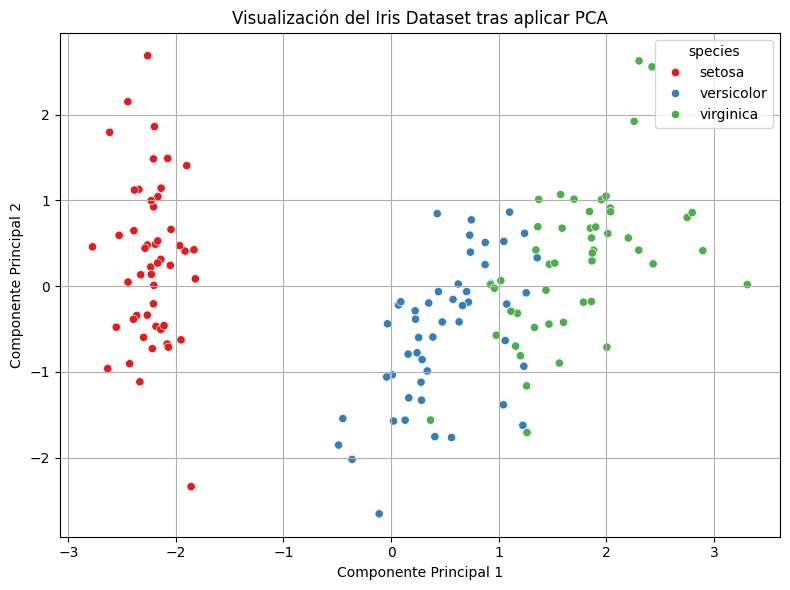

In [3]:
# Paso 3: Visualización en 2D de los datos transformados por PCA

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='Set1')
plt.title('Visualización del Iris Dataset tras aplicar PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.tight_layout()
plt.show()
